Classification Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report




df = pd.read_csv('dataUsed/data.csv')

df.isna().sum() #check for nan values
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] # removes unamed column (https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe)

df.head()

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error
0,1,84,254,0,3,2
1,0,58,247,0,6,9
2,0,56,125,1,6,8
3,0,55,22,0,11,7
4,1,95,262,0,2,3


Variable Assignment

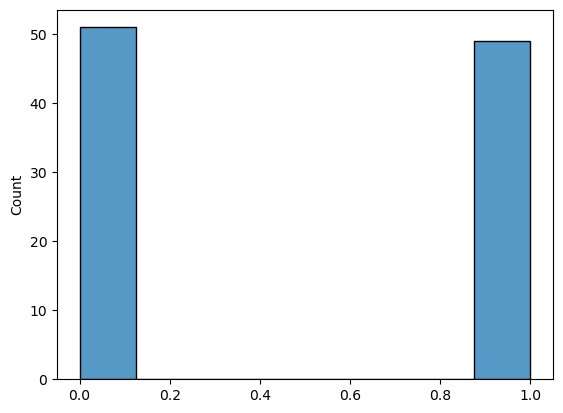

In [2]:
x = df.drop(columns=['Purchase', 'SUS']).to_numpy() # dependent vars
y = df['Purchase'].to_numpy() # independent vars

sns.histplot(data=y, palette='bright')
plt.show()
# display purchase data, nearly even customers did or did not purchase

In [3]:
# data preperation

scale = StandardScaler()
xScale = scale.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(xScale, y, test_size=0.3)


Models

In [4]:
logistic = LogisticRegression()
neighbors = KNeighborsClassifier(n_neighbors=3)
svc = SVC(probability=True)
gauss = GaussianNB()
randomForest = RandomForestClassifier()




logistic.fit(x_train,y_train)
neighbors.fit(x_train,y_train)
svc.fit(x_train,y_train)
gauss.fit(x_train,y_train)
randomForest.fit(x_train,y_train)


RandomForestClassifier()

Testing and Prediction

c:\Users\alecr\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       1.00      0.72      0.84        18
           1       0.71      1.00      0.83        12

    accuracy                           0.83        30
   macro avg       0.85      0.86      0.83        30
weighted avg       0.88      0.83      0.83        30

              precision    recall  f1-score   support

           0       1.00      0.56      0.71        18
           1       0.60      1.00      0.75        12

    accuracy                           0.73        30
   macro avg       0.80      0.78      0.73        30
weighted avg       0.84      0.73      0.73        30

              precision    recall  f1-score   support

           0       0.64      0.39      0.48        18
           1       0.42      0.67      0.52        12

    accuracy                           0.50        30
   macro avg       0.53      0.53      0.50        30
weighted avg       0.55      0.50      0.50        30

              preci

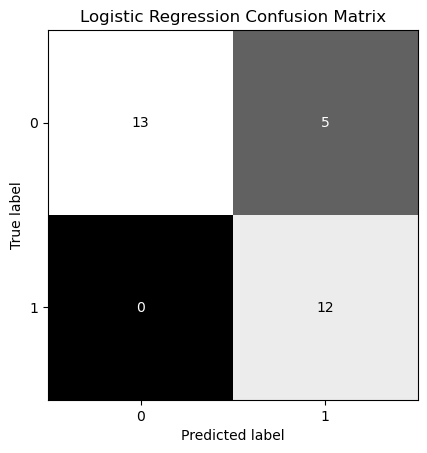

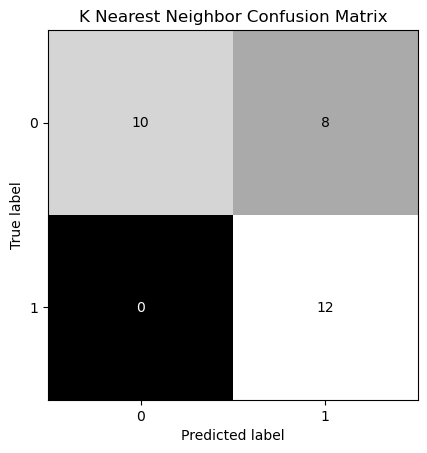

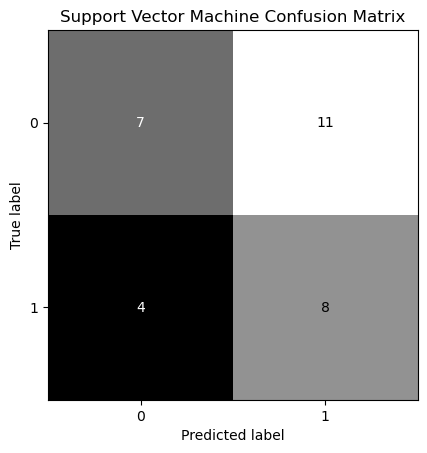

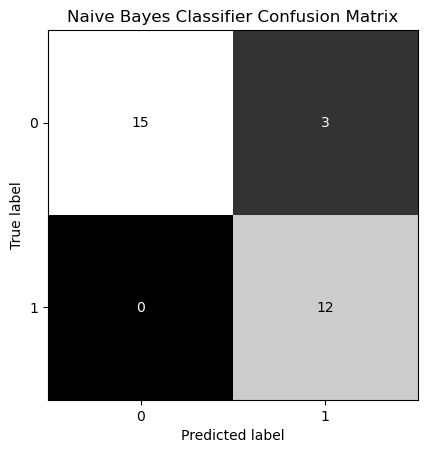

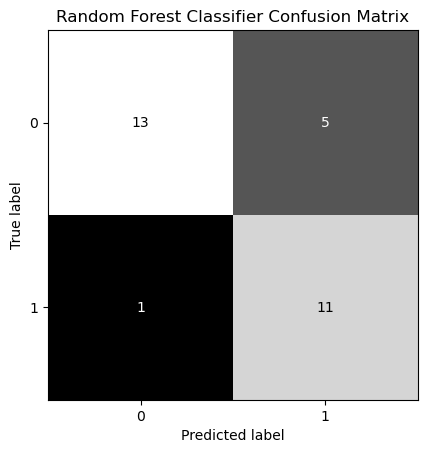

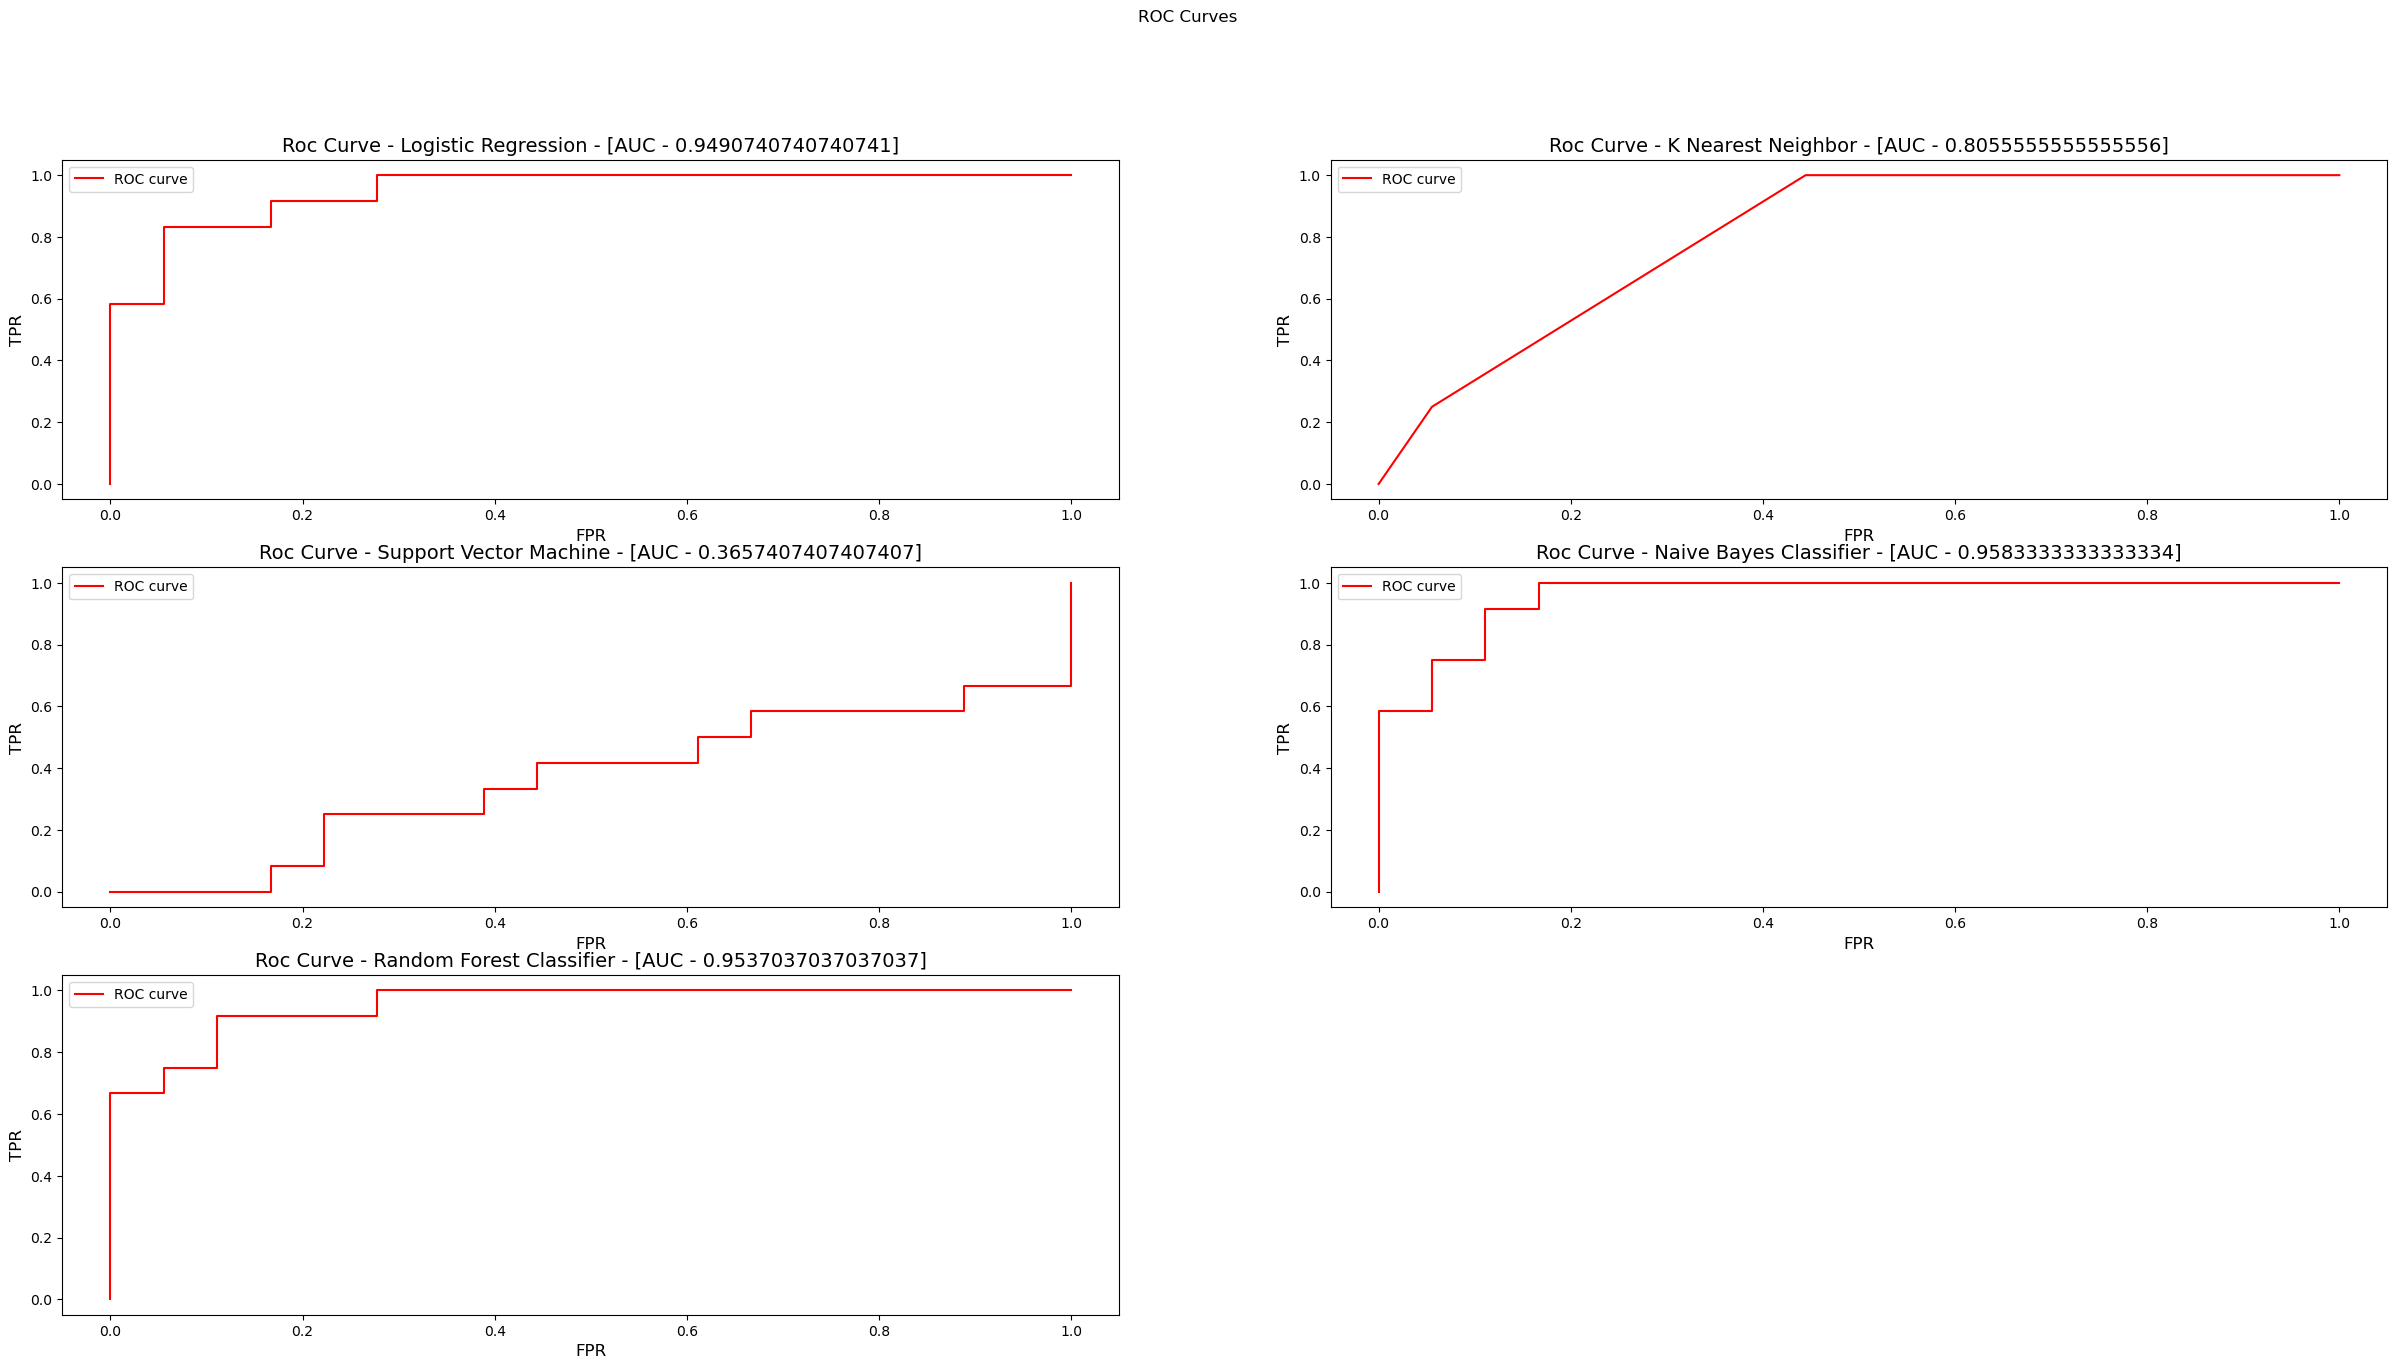

In [5]:
y_logistic_predicted = logistic.predict(x_test)
y_logistic_pred_proba = logistic.predict_proba(x_test)

y_neighbors_predicted = neighbors.predict(x_test)
y_neighbors_pred_proba = neighbors.predict_proba(x_test)

y_svc_predicted = svc.predict(x_test)
y_svc_pred_proba = svc.predict_proba(x_test)

y_gauss_predicted = gauss.predict(x_test)
y_gauss_pred_proba = gauss.predict_proba(x_test)

y_randomForest_predicted = randomForest.predict(x_test)
y_randomForest_pred_proba = randomForest.predict_proba(x_test)

print(classification_report(y_test, y_logistic_predicted))
print(classification_report(y_test, y_neighbors_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_gauss_predicted))
print(classification_report(y_test, y_randomForest_predicted))

models = ['Logistic Regression', 'K Nearest Neighbor', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_logistic_predicted, y_neighbors_predicted, y_svc_predicted, y_gauss_predicted, y_randomForest_predicted]
pred_probabilities = [y_logistic_pred_proba, y_neighbors_pred_proba, y_svc_pred_proba, y_gauss_pred_proba, y_randomForest_pred_proba]

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()
